# E9 213 Time Frequency Analysis - Assignment 3
***
*Submitted by: Dwaipayan Haldar*<br>
*S.R. No. : 27128*

<div style="padding:10px; background-color:#ffe6e6;">
  Here, I have used ipywidgets's interact tool to make interactive slider for problem number 5 and 6. In order to run in any other system, one must install ipywidgets in their current environment. <a href="https://ipywidgets.readthedocs.io/en/latest/user_install.html">Here</a> is how to install it. 
</div>

In [1]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
from tftb.processing import PseudoWignerVilleDistribution, ShortTimeFourierTransform, WignerVilleDistribution 
import ipywidgets as widgets
from ipywidgets import interact,fixed
from scipy.signal import windows
import scipy.io as sio
import librosa
import h5py
from scipy.signal import decimate

### Problem 1: Computing the Spectrogram and WVD

In [52]:
#Defining the Functions 

def sin(w_0 = 2*np.pi*50):
    t = np.arange(0,10,0.005)
    x = np.sin(w_0*t)
    return t,x

def gaussian(sigma = 1):
    t = np.arange(0,10,0.005)
    x = np.exp(-((t-5)/sigma)**2)
    return t,x

def linear_chirp():
    t = np.arange(0,10,0.005)
    f0, f1 = 5, 50
    T = t[-1] - t[0]
    w_0 = 2 * np.pi * (f0 + (f1 - f0) * t / (2 * T))
    x = np.sin(w_0*t)
    return t, x

def gabor(sigma = 1, w_0 = 2*np.pi*50):
    t = np.arange(0, 10, 0.005)
    _ , x_1 = sin(w_0)
    _, x_2 = gaussian(sigma)
    x = x_1*x_2
    return t,x
 

#### Problem 1a: Spectrogram(The Bartlett Window)

In [ ]:
#Spectrogram with Bartlett Window

def plot(func, overlap = 1, window_length = 250):
    t, x = func()
    stft = ShortTimeFourierTransform(x, t[::overlap], fwindow=np.bartlett(window_length))
    stft.run()

    S = np.abs(stft.tfr)
    n_f, n_t = S.shape
    f_s = 1/(t[1]-t[0])
    F = np.linspace(0,f_s, n_f)
    T = np.linspace(t[0], t[-1], n_t)

    S_dB = 20 * np.log10(S / np.max(S) + 1e-12) 

    plt.figure(figsize=(12,8))
    plt.pcolormesh(T, F, S_dB, shading = 'auto', cmap = 'plasma')
    plt.colorbar(label = "Magnitude(dB)")
    plt.title(F"Short Time Fourier Transform({func.__name__})", fontsize = 14)
    plt.xlabel("Time(s)", fontsize = 12)
    plt.ylabel("Frequency (Hz)", fontsize = 12)
    plt.ylim(0, f_s/2)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{func.__name__}_{overlap}_{window_length}.png")
    plt.show()
    print(f"Size of the matrix is {n_f}*{n_t}")


interact(plot, func = fixed(sin), window_length=widgets.FloatSlider(min=50, max=500, step=50, description='WL'), overlap = widgets.IntSlider(min=1, max = 100, step = 5, description = 'WL - Overlap' ))
interact(plot, func = fixed(gaussian), window_length=widgets.FloatSlider(min=50, max=500, step=50, description='WL'), overlap = widgets.IntSlider(min=1, max = 100, step = 5, description = 'WL - Overlap' ))
interact(plot, func = fixed(linear_chirp), window_length=widgets.FloatSlider(min=50, max=500, step=50, description='WL'), overlap = widgets.IntSlider(min=1, max = 100, step = 5, description = 'WL - Overlap' ))
interact(plot, func = fixed(gabor), window_length=widgets.FloatSlider(min=50, max=500, step=50, description='WL'), overlap = widgets.IntSlider(min=1, max = 100, step = 5, description = 'WL - Overlap' ))


interactive(children=(IntSlider(value=1, description='WL - Overlap', min=1, step=5), FloatSlider(value=50.0, d…

interactive(children=(IntSlider(value=1, description='WL - Overlap', min=1, step=5), FloatSlider(value=50.0, d…

interactive(children=(IntSlider(value=1, description='WL - Overlap', min=1, step=5), FloatSlider(value=50.0, d…

interactive(children=(IntSlider(value=1, description='WL - Overlap', min=1, step=5), FloatSlider(value=50.0, d…

<function __main__.plot(func, overlap=1, window_length=250)>

#### Problem 1a: Spectrogram(The Gaussian Window)

In [ ]:
#Spectrogram with the Gaussian Window

def plot(func, overlap = 1, window_length = 250):
    t, x = func()
    stft = ShortTimeFourierTransform(x, t[::overlap], fwindow=windows.gaussian(window_length, std= 10))
    stft.run()

    S = np.abs(stft.tfr)
    n_f, n_t = S.shape
    f_s = 1/(t[1]-t[0])
    F = np.linspace(0,f_s, n_f)
    T = np.linspace(t[0], t[-1], n_t)

    S_dB = 20 * np.log10(S / np.max(S) + 1e-12) 

    plt.figure(figsize=(12,8))
    plt.pcolormesh(T, F, S_dB, shading = 'auto', cmap = 'plasma')
    plt.colorbar(label = "Magnitude(dB)")
    plt.title(F"Short Time Fourier Transform({func.__name__})", fontsize = 14)
    plt.xlabel("Time(s)", fontsize = 12)
    plt.ylabel("Frequency (Hz)", fontsize = 12)
    plt.ylim(0, f_s/2)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"Gau_Win_{func.__name__}_{overlap}_{window_length}.png ")
    plt.show()
    print(f"Size of the matrix is {n_f}*{n_t}")


interact(plot, func = fixed(sin), window_length=widgets.FloatSlider(min=50, max=500, step=50, description='WL'), overlap = widgets.IntSlider(min=1, max = 100, step = 5, description = 'WL - Overlap' ))
interact(plot, func = fixed(gaussian), window_length=widgets.FloatSlider(min=50, max=500, step=50, description='WL'), overlap = widgets.IntSlider(min=1, max = 100, step = 5, description = 'WL - Overlap' ))
interact(plot, func = fixed(linear_chirp), window_length=widgets.FloatSlider(min=50, max=500, step=50, description='WL'), overlap = widgets.IntSlider(min=1, max = 100, step = 5, description = 'WL - Overlap' ))
interact(plot, func = fixed(gabor), window_length=widgets.FloatSlider(min=50, max=500, step=50, description='WL'), overlap = widgets.IntSlider(min=1, max = 100, step = 5, description = 'WL - Overlap' ))

interactive(children=(IntSlider(value=1, description='WL - Overlap', min=1, step=5), FloatSlider(value=50.0, d…

interactive(children=(IntSlider(value=1, description='WL - Overlap', min=1, step=5), FloatSlider(value=50.0, d…

interactive(children=(IntSlider(value=1, description='WL - Overlap', min=1, step=5), FloatSlider(value=50.0, d…

interactive(children=(IntSlider(value=1, description='WL - Overlap', min=1, step=5), FloatSlider(value=50.0, d…

<function __main__.plot(func, overlap=1, window_length=250)>

#### Problem 1b: The Wigner-Ville Distribution

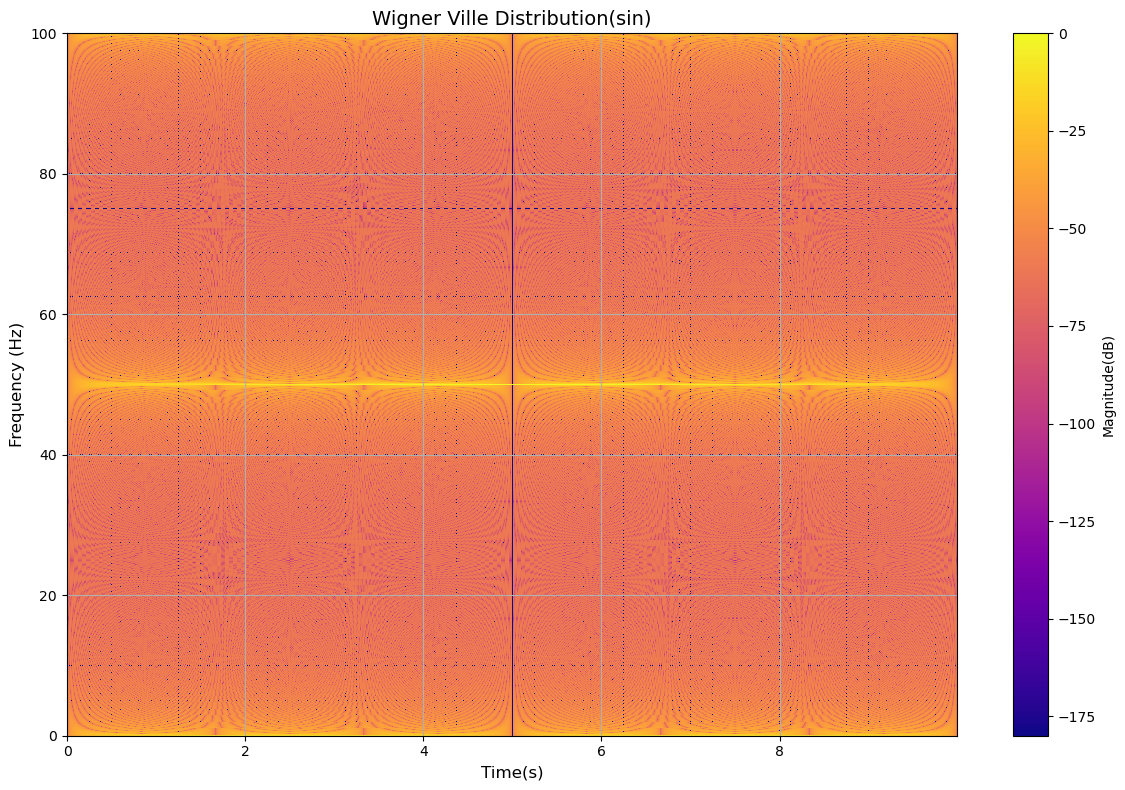

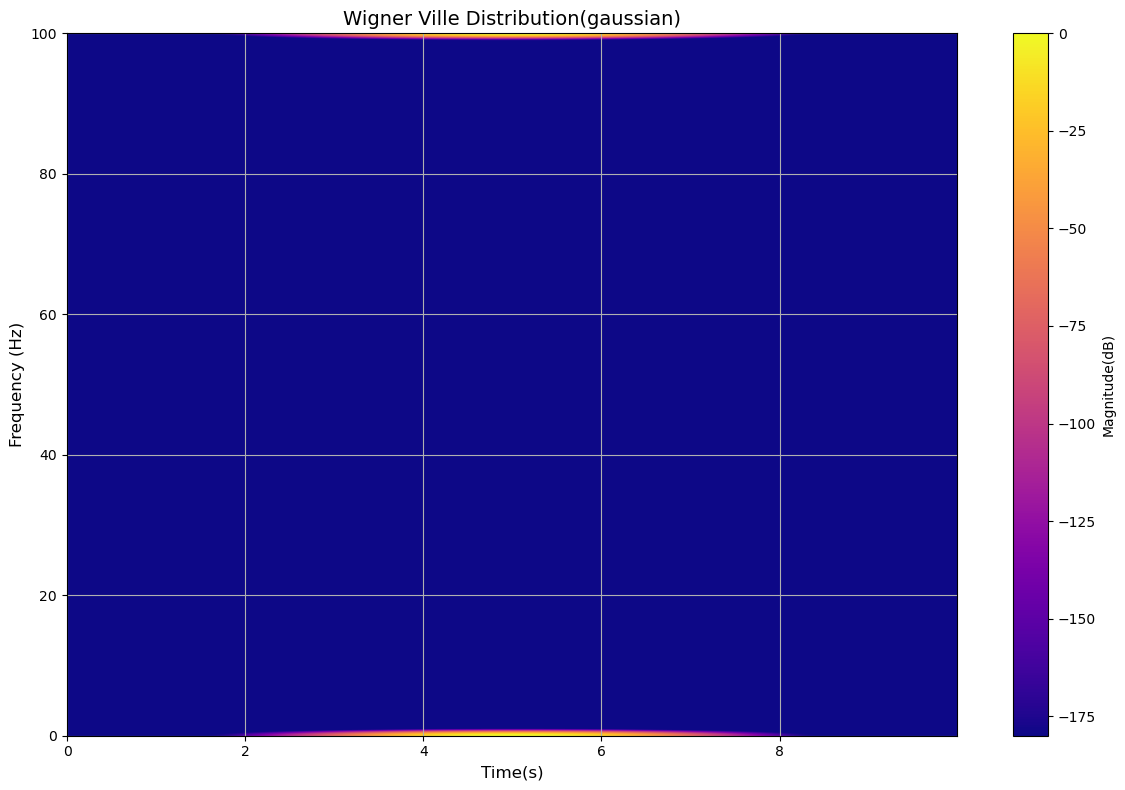

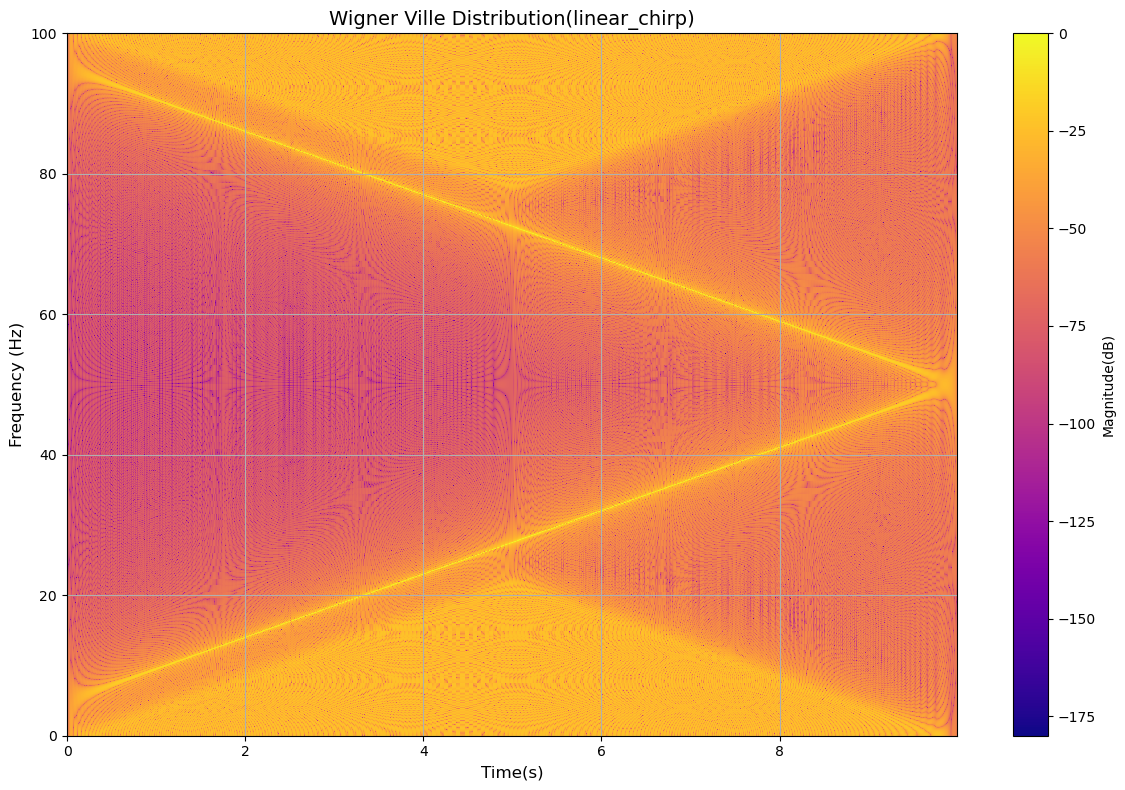

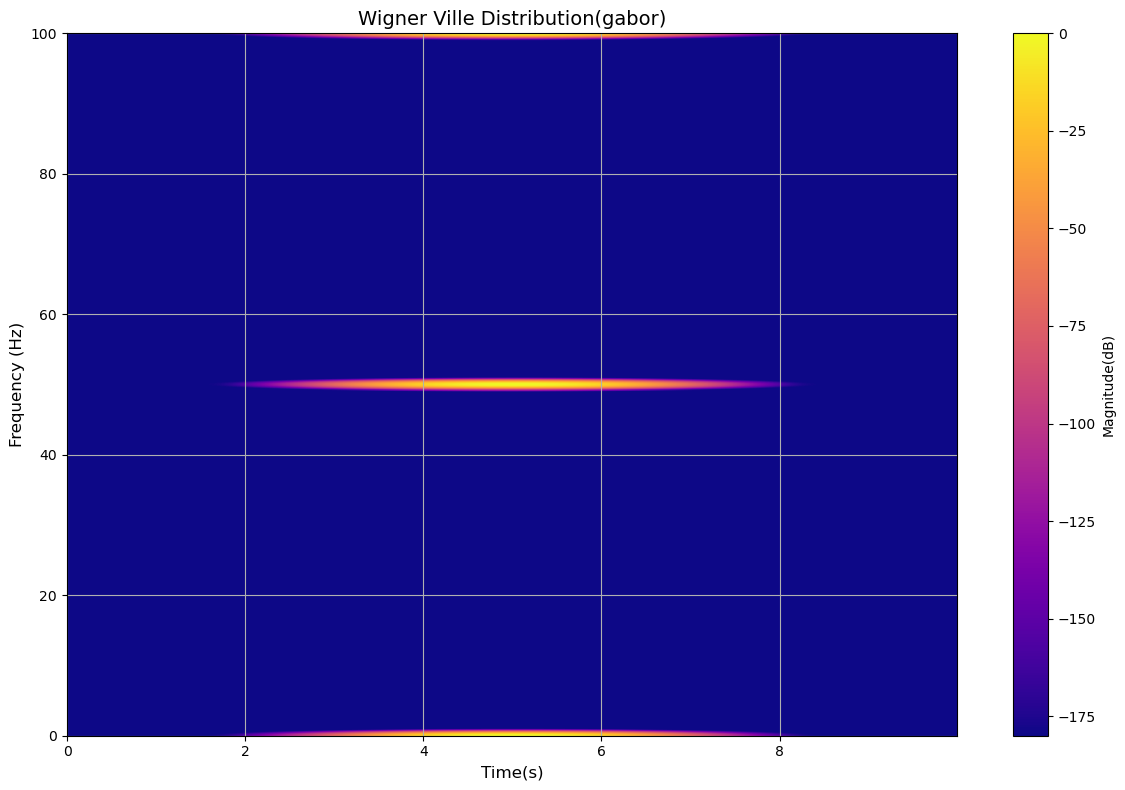

In [53]:
def plot_wvd(func):
    t, x = func()
    wvd = WignerVilleDistribution(x, t)
    wvd.run()

    S = np.abs(wvd.tfr)
    n_f, n_t = S.shape
    f_s = 1/(t[1]-t[0])
    F = np.linspace(0,f_s/2, n_f)
    T = np.linspace(t[0], t[-1], n_t)

    S_dB = 20 * np.log10(S / np.max(S) + 1e-9) 

    plt.figure(figsize=(12,8))
    plt.pcolormesh(T, F, S_dB, shading = 'auto', cmap = 'plasma')
    plt.colorbar(label = "Magnitude(dB)")
    plt.title(F"Wigner Ville Distribution({func.__name__})", fontsize = 14)
    plt.xlabel("Time(s)", fontsize = 12)
    plt.ylabel("Frequency (Hz)", fontsize = 12)
    plt.ylim(0, f_s/2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_wvd(sin)
plot_wvd(gaussian)
plot_wvd(linear_chirp)
plot_wvd(gabor)


### Problem 2: STFT and WVD of different real life signals

#### Problem 2a: EEG Signal

In [48]:
eeg_data = sio.loadmat('Dataset_for_A3/EEG/eegDataAll.mat')

all_eeg_data = eeg_data['eegDataAll'][0]
t = eeg_data['timeVals'].T
t = t.squeeze()
avg_1cond_data = {}

for i in range(8):
    avg_1cond_data[i] = np.average(all_eeg_data[i], axis =1)[0]

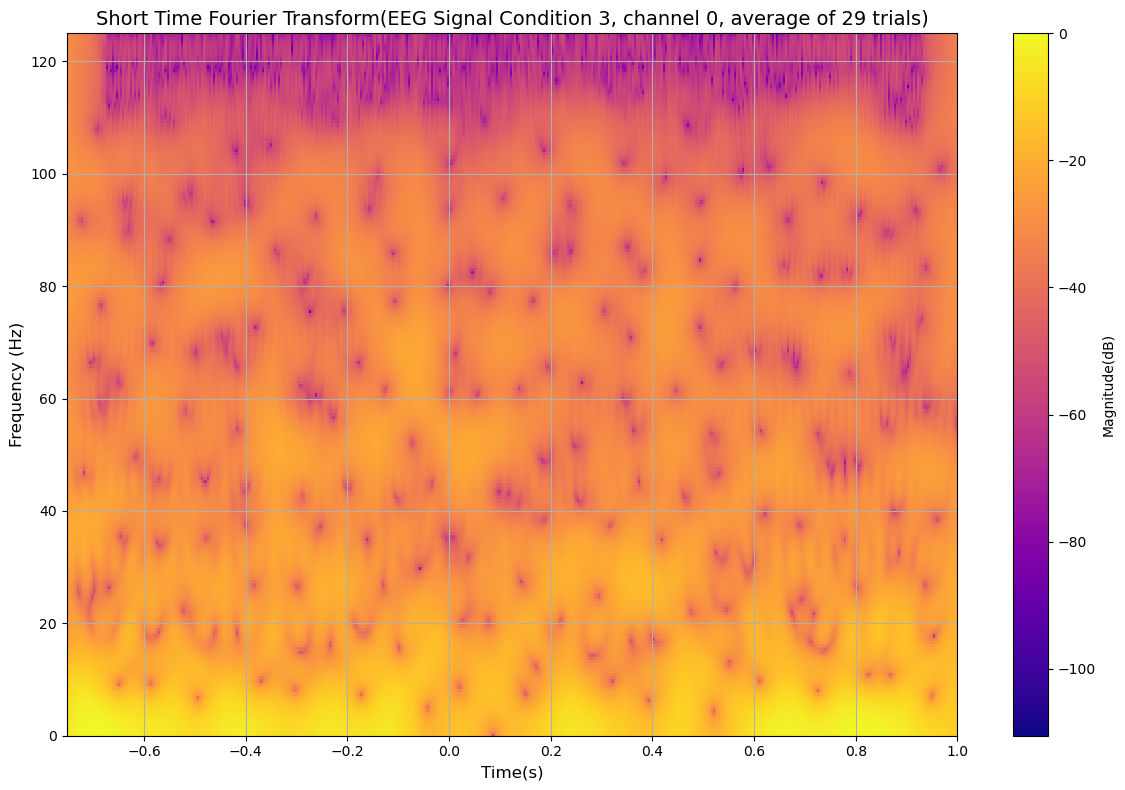

In [49]:
stft = ShortTimeFourierTransform(avg_1cond_data[3], t, fwindow=np.bartlett(40))
stft.run()

S = np.abs(stft.tfr)
n_f, n_t = S.shape
f_s = 1/(t[1]-t[0])
F = np.linspace(0,f_s, n_f)
T = np.linspace(t[0], t[-1], n_t)

S_dB = 20 * np.log10(S / np.max(S) + 1e-12) 

plt.figure(figsize=(12,8))
plt.pcolormesh(T, F, S_dB, shading = 'auto', cmap = 'plasma')
plt.colorbar(label = "Magnitude(dB)")
plt.title(F"Short Time Fourier Transform(EEG Signal Condition 3, channel 0, average of 29 trials)", fontsize = 14)
plt.xlabel("Time(s)", fontsize = 12)
plt.ylabel("Frequency (Hz)", fontsize = 12)
plt.ylim(0, f_s/2)
plt.grid(True)
plt.tight_layout()
plt.show()

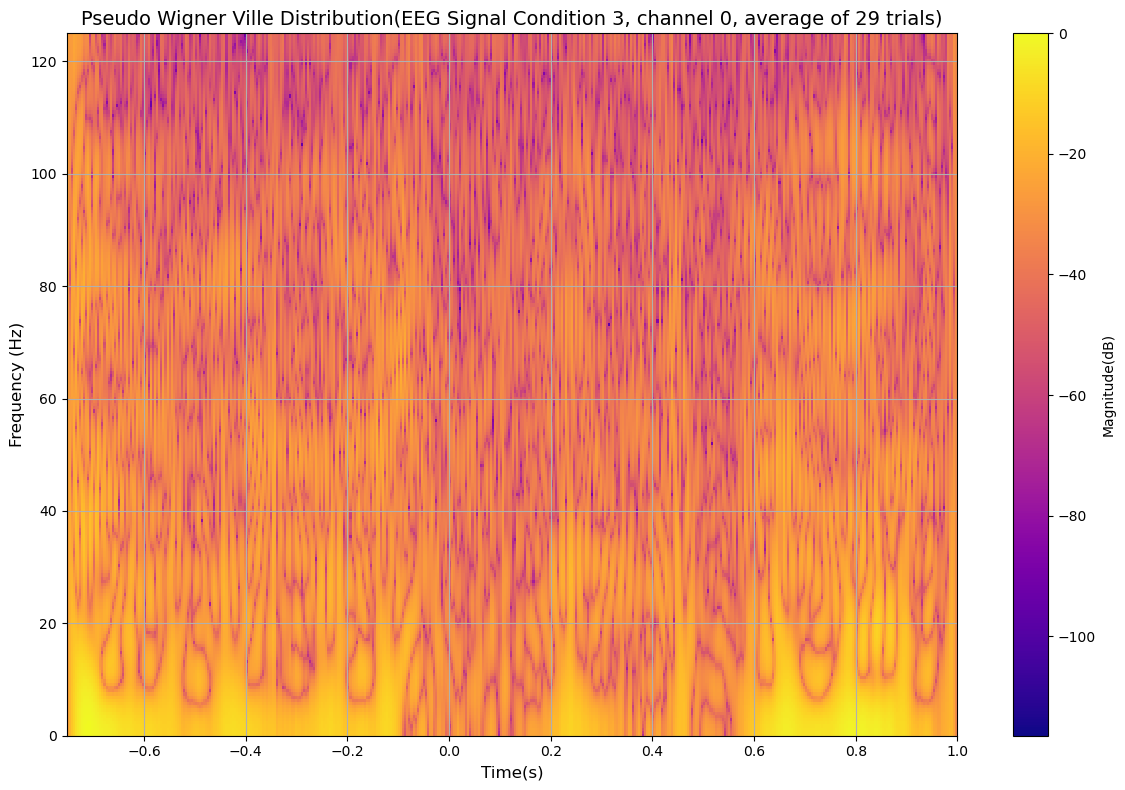

In [51]:
pseudo_wvd = PseudoWignerVilleDistribution(avg_1cond_data[3], t, fwindow=np.bartlett(40))
pseudo_wvd.run()

S = np.abs(pseudo_wvd.tfr)
n_f, n_t = S.shape
f_s = 1/(t[1]-t[0])
F = np.linspace(0,f_s, n_f)
T = np.linspace(t[0], t[-1], n_t)

S_dB = 20 * np.log10(S / np.max(S) + 1e-12) 

plt.figure(figsize=(12,8))
plt.pcolormesh(T, F, S_dB, shading = 'auto', cmap = 'plasma')
plt.colorbar(label = "Magnitude(dB)")
plt.title(F"Pseudo Wigner Ville Distribution(EEG Signal Condition 3, channel 0, average of 29 trials)", fontsize = 14)
plt.xlabel("Time(s)", fontsize = 12)
plt.ylabel("Frequency (Hz)", fontsize = 12)
plt.ylim(0, f_s/2)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Problem 2b: LIGO Signal

In [56]:
ligo_signal = h5py.File('Dataset_for_A3/LIGO/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'r')

ligo_signal_samples = ligo_signal['strain']['Strain'][8379512:8389512]
t_ligo = np.arange(10000)/4096

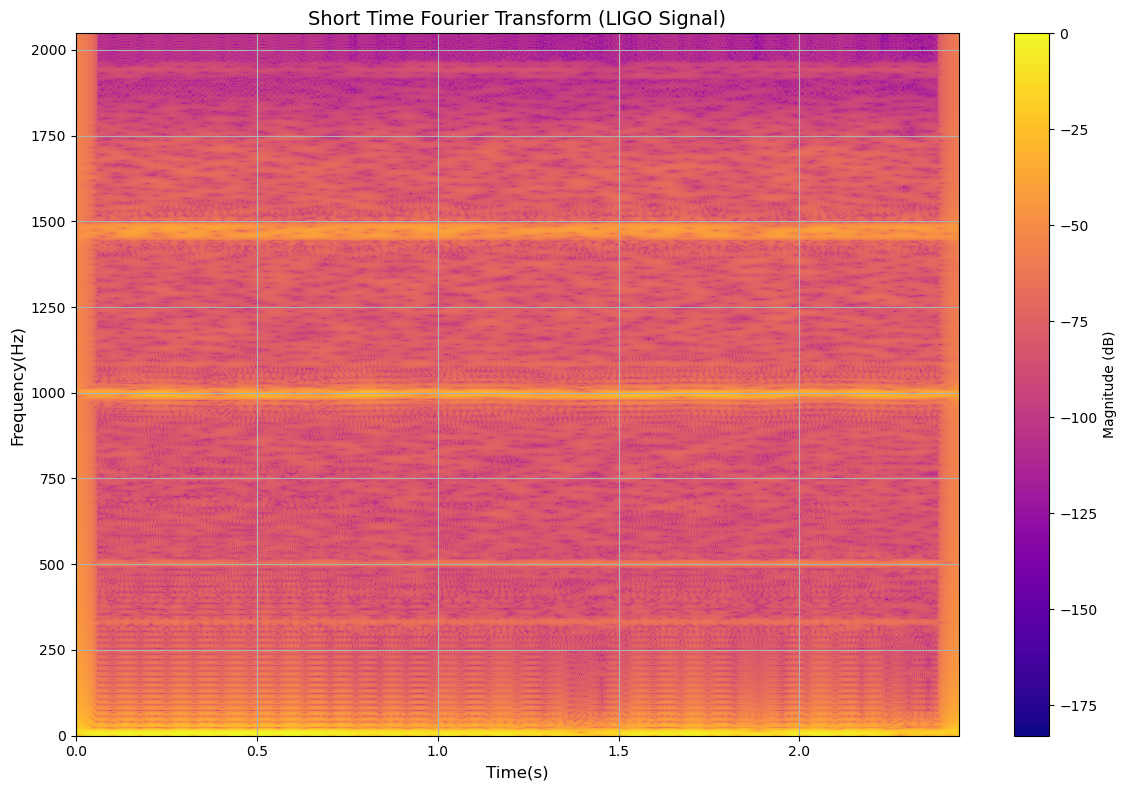

In [59]:
stft = ShortTimeFourierTransform(ligo_signal_samples, timestamps=t_ligo, fwindow=np.bartlett(500))
stft.run()

S = np.abs(stft.tfr)
n_f, n_t = S.shape
f_s = 1/(t_ligo[1]-t_ligo[0])
F = np.linspace(0,f_s, n_f)
T = np.linspace(t_ligo[0], t_ligo[-1], n_t)    

S_dB = 20 * np.log10(S / np.max(S) + 1e-12)

plt.figure(figsize=(12,8))
plt.pcolormesh(T, F, S_dB, shading='auto', cmap='plasma')
plt.colorbar(label="Magnitude (dB)")
plt.title("Short Time Fourier Transform (LIGO Signal)", fontsize=14)
plt.xlabel("Time(s)", fontsize=12)
plt.ylabel("Frequency(Hz)", fontsize=12)
plt.ylim(0, f_s/2)
plt.grid(True)
plt.tight_layout()
plt.show()

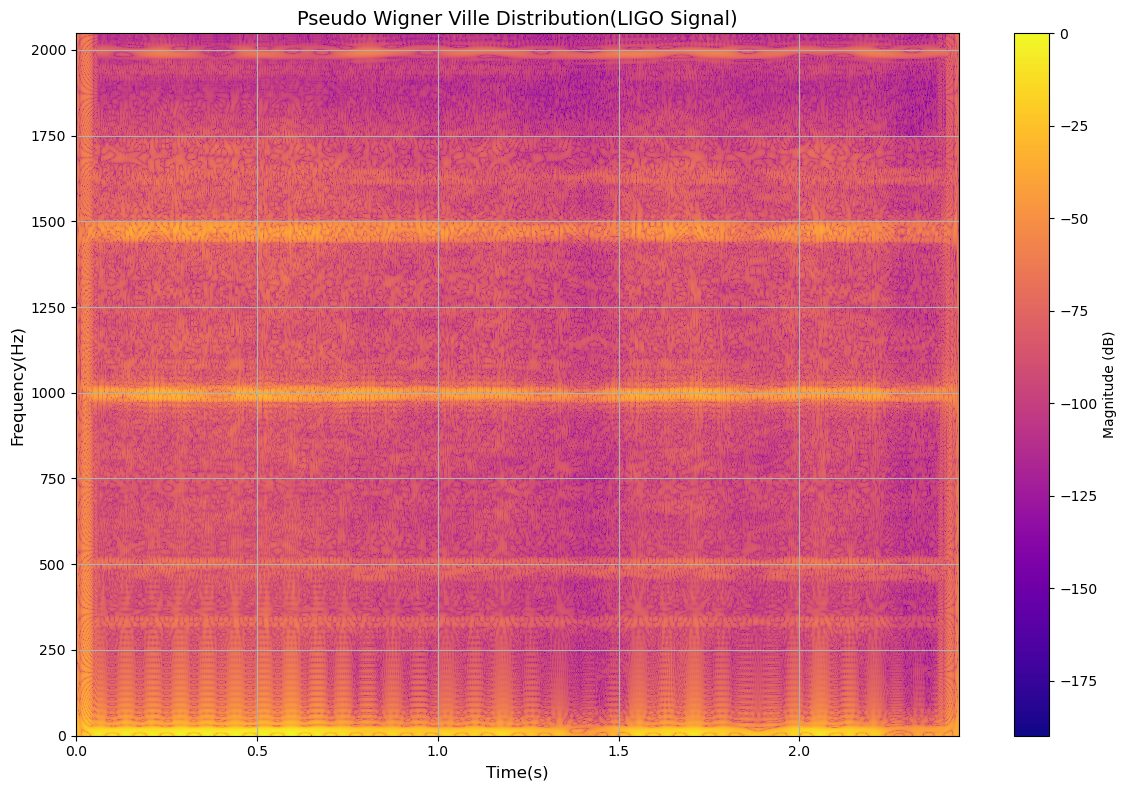

In [60]:
pseudowvd = PseudoWignerVilleDistribution(ligo_signal_samples, timestamps = t_ligo, fwindow=np.bartlett(500))
pseudowvd.run()

S = np.abs(pseudowvd.tfr)
n_f, n_t = S.shape
f_s = 1/(t_ligo[1]-t_ligo[0])
F = np.linspace(0,f_s, n_f)
T = np.linspace(t_ligo[0], t_ligo[-1], n_t)    

S_dB = 20 * np.log10(S / np.max(S) + 1e-12)

plt.figure(figsize=(12,8))
plt.pcolormesh(T, F, S_dB, shading='auto', cmap='plasma')
plt.colorbar(label="Magnitude (dB)")
plt.title("Pseudo Wigner Ville Distribution(LIGO Signal)", fontsize=14)
plt.xlabel("Time(s)", fontsize=12)
plt.ylabel("Frequency(Hz)", fontsize=12)
plt.ylim(0, f_s/2)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Problem 2c: The mmWave Radar Signal

In [11]:
mmWave = sio.loadmat('Dataset_for_A3/mmWave_RADAR/file/distance_sp_3.mat')

mmWave_samples = mmWave['samples'].T.squeeze()
mmWave_samples = mmWave_samples[:10000]

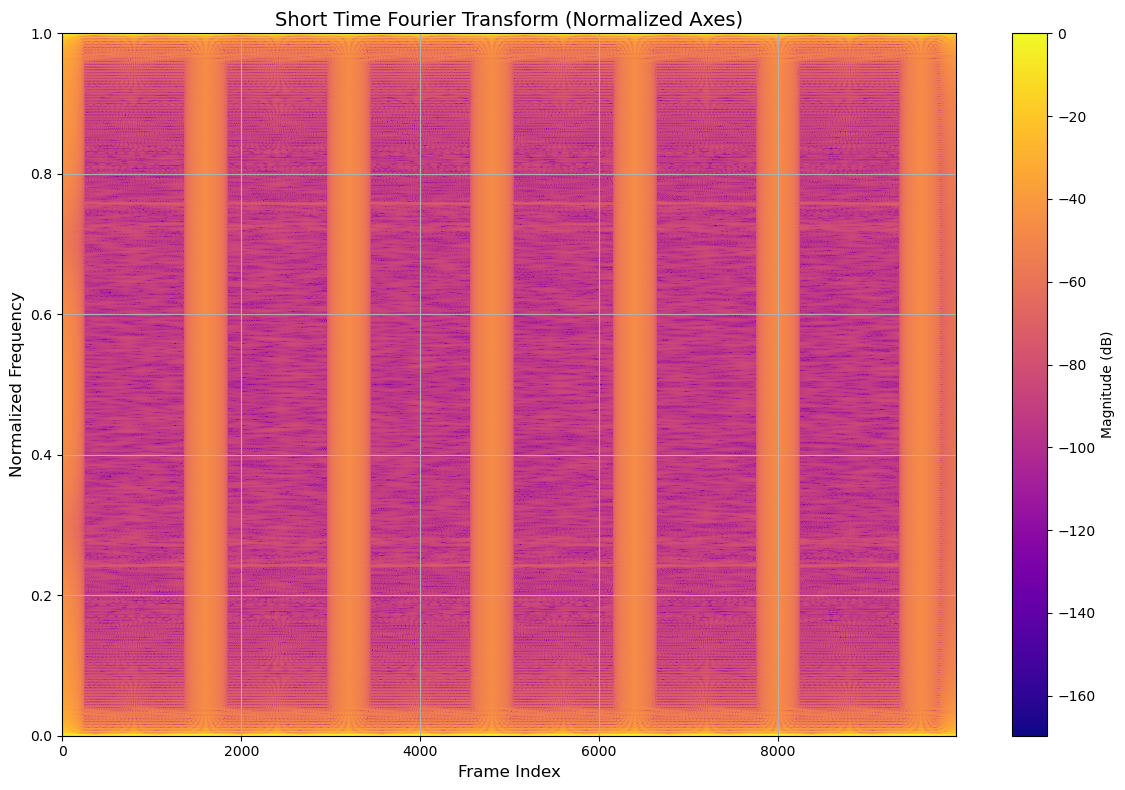

In [ ]:
stft = ShortTimeFourierTransform(mmWave_samples, fwindow=np.bartlett(500))
stft.run()

S = np.abs(stft.tfr)
n_f, n_t = S.shape
F = np.linspace(0, 1, n_f)  
T = np.arange(n_t)          

S_dB = 20 * np.log10(S / np.max(S) + 1e-12)

plt.figure(figsize=(12,8))
plt.pcolormesh(T, F, S_dB, shading='auto', cmap='plasma')
plt.colorbar(label="Magnitude (dB)")
plt.title("Short Time Fourier Transform (MM Wave Signal)", fontsize=14)
plt.xlabel("Frame Index", fontsize=12)
plt.ylabel("Normalized Frequency", fontsize=12)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

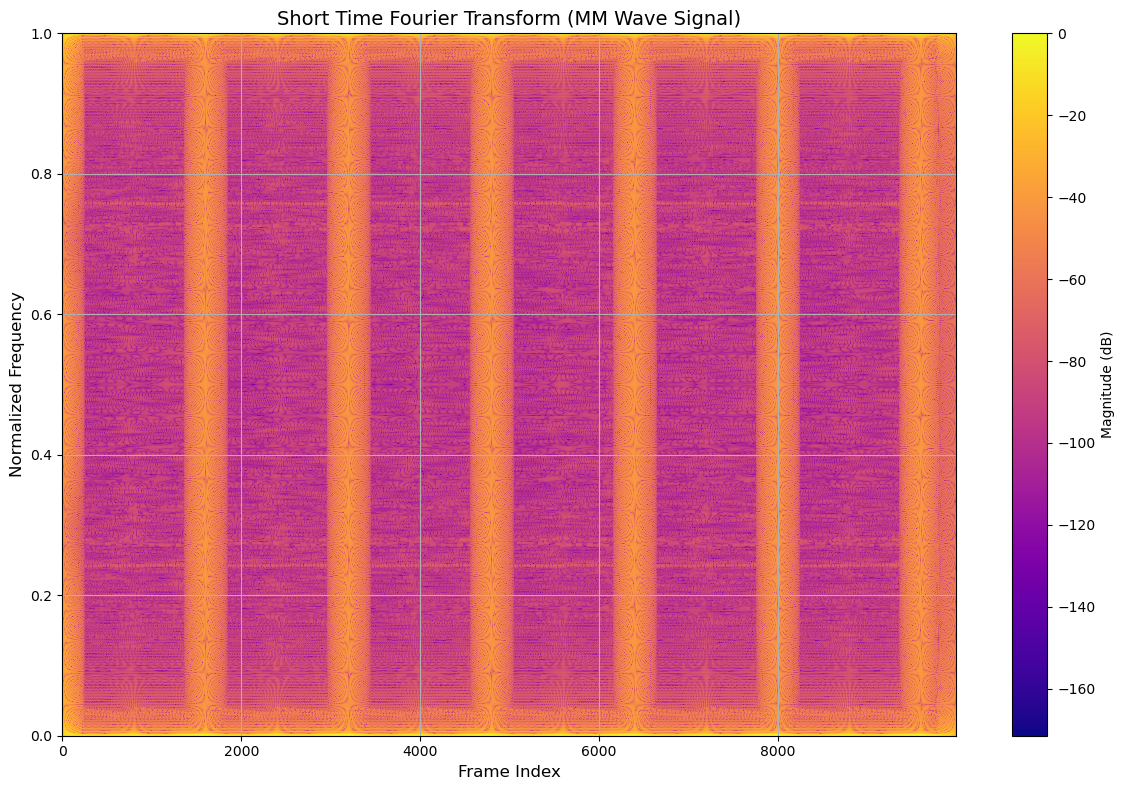

In [ ]:
pseudo_wvd = PseudoWignerVilleDistribution(mmWave_samples, fwindow=np.bartlett(500))
pseudo_wvd.run()

S = np.abs(pseudo_wvd.tfr)
n_f, n_t = S.shape
F = np.linspace(0, 1, n_f)  
T = np.arange(n_t)          

S_dB = 20 * np.log10(S / np.max(S) + 1e-12)

plt.figure(figsize=(12,8))
plt.pcolormesh(T, F, S_dB, shading='auto', cmap='plasma')
plt.colorbar(label="Magnitude (dB)")
plt.title("Wigner Ville Distribution (MM Wave Signal)", fontsize=14)
plt.xlabel("Frame Index", fontsize=12)
plt.ylabel("Normalized Frequency", fontsize=12)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Problem 2d: Music Signals